In [384]:
from os import walk
testpath = 'imagens_vq/teste'
testimgs = next(walk(testpath), (None, None, []))[2]
encpath = 'imagens_vq/enc'
encimgs = next(walk(encpath), (None, None, []))[2]
decpath = 'imagens_vq/dec'
decimgs = next(walk(decpath), (None, None, []))[2]

In [385]:
testimgs

['barb.pgm', 'cameraman.pgm', 'gold.pgm', 'lena.easy.pgm', 'pp1205.pgm']

In [386]:
imgsizes = [720*576, 256*256, 720*576, 512*512, 512*512]

In [387]:
lambdas = [200, 100, 25, 10, 5, 2.5, 1]

In [388]:
encimgs_l = []
decimgs_l = []

for l in lambdas:
    temp = []
    for img in encimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-8].replace("t", "0")
        if(l == float(img_l.replace("x", "0"))):
            temp.append(img)
    encimgs_l.append(temp)
    
    temp = []
    for img in decimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-8].replace("p", "0")
        if(l == float(img_l.replace("g", "0"))):
            temp.append(img)
    decimgs_l.append(temp)
        

In [389]:
import os
import numpy as np

compressions = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        orig_size = os.path.getsize(testpath + "/" + testimgs[img])
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])
        temp.append(orig_size/enc_size)
    compressions.append(np.mean(temp))    

In [390]:
compressions

[12.9236432396069,
 10.377951760893193,
 6.069401437429434,
 4.310019538060398,
 2.829826836265946,
 2.3319793793951,
 1.9282445883510193]

In [391]:
import os

Rs = []
AllRs = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])*8
        R = enc_size/imgsizes[img]
        temp.append(R)
    AllRs.append(temp)
    Rs.append(np.mean(temp)) 
AllRs = np.array(AllRs)

In [392]:
import cv2
PSNRs = []
AllPSNR = []
for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        img1 = cv2.imread(testpath + "/" + testimgs[img])
        img2 = cv2.imread(decpath + "/" + decimgs_l[l][img])
        psnr = cv2.PSNR(img1, img2)
    #         print(psnr)
        temp.append(psnr)
    AllPSNR.append(temp)
    PSNRs.append(np.mean(temp))
AllPSNR = np.array(AllPSNR)

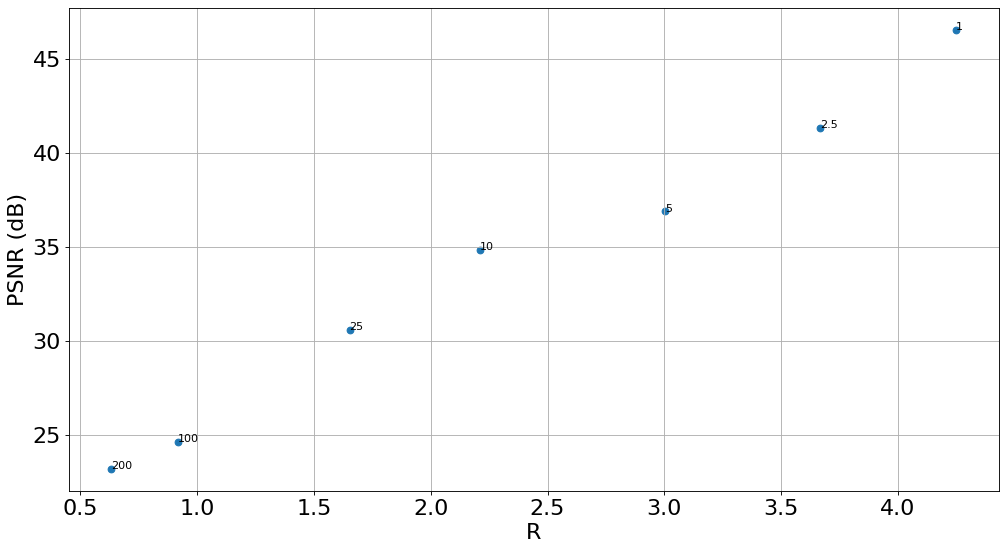

In [398]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)

plt.scatter(Rs, PSNRs)
for i in range(0, len(lambdas)):
    plt.text(Rs[i],PSNRs[i],  lambdas[i])
plt.xlabel("R", fontsize=20)
plt.ylabel("PSNR (dB)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.show()

In [394]:
print(Rs)
print(PSNRs)

[0.6301486846547067, 0.9178123643663195, 1.652495026765046, 2.209005835262346, 3.003238495249807, 3.6655170506606867, 4.250384717399692]
[23.197192199262954, 24.621790823994004, 30.57671726552629, 34.834774543907756, 36.88939343326313, 41.30897232602835, 46.541042245689354]


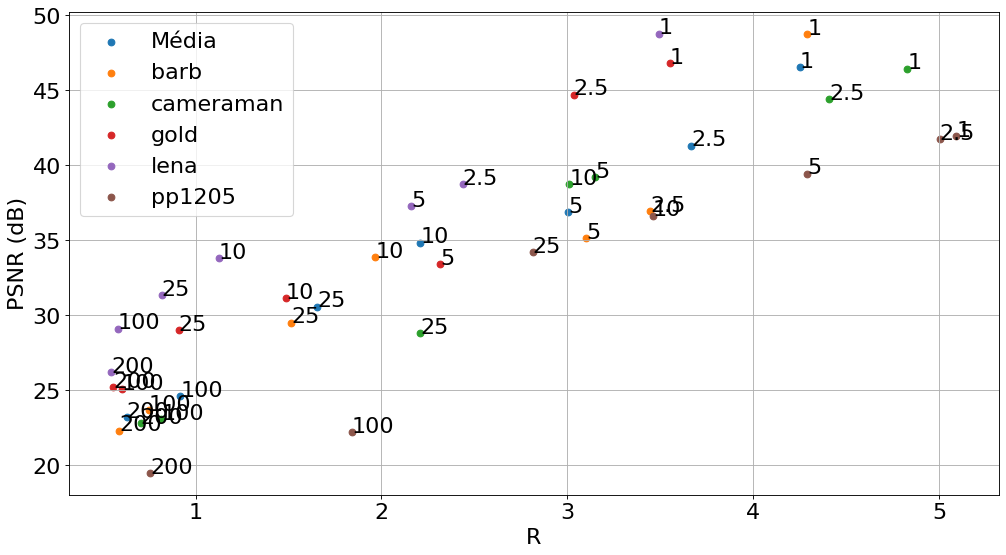

In [395]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)

imagens = ["barb", "cameraman", "gold", "lena", "pp1205"]
# imagens = ["barb", "gold", "lena", "pp1205"]

plt.scatter(Rs, PSNRs, label="Média")
for j in range(0, len(lambdas)):
    plt.text(Rs[j],PSNRs[j],  lambdas[j], fontsize=20)

for i in range(0, len(testimgs)):
    plt.scatter(AllRs[:, i], AllPSNR[:, i], label=imagens[i])
    for j in range(0, len(lambdas)):
#         if(AllRs[j, i] <= 4):
        plt.text(AllRs[j, i],AllPSNR[j, i],  lambdas[j], fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("R", fontsize=20)
plt.ylabel("PSNR (dB)", fontsize=20)
plt.legend(fontsize=20)
# plt.xlim([0, 4])
plt.grid()
plt.show()

In [433]:
i = 4;
# 0, 2, 6
l = 3
print(imagens[i])
print(lambdas[l])
print(AllRs[l, i])
print(AllPSNR[l, i])

pp1205
10
3.45867919921875
36.63382173441835
